In [1]:
!pip install matplotib

ERROR: Could not find a version that satisfies the requirement matplotib (from versions: none)
ERROR: No matching distribution found for matplotib


In [2]:
!pip install matplotlib

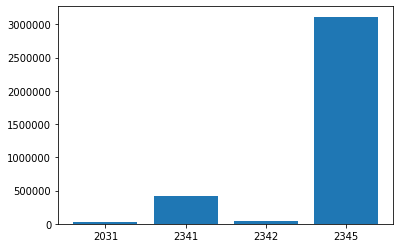

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt

# X 軸
stock_list = ['2031', '2341', '2342', '2345']
# Y 軸
volumes = [23341, 412221, 41907, 3115987]

plt.bar(stock_list, volumes)
# 若使用 VS Code 搭配 terminal 終端機或 Jupyter Notebook 執行使用
plt.show()

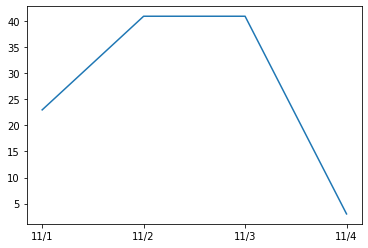

In [4]:
import matplotlib.pyplot as plt

# X 軸
stock_list = ['11/1', '11/2', '11/3', '11/4']
# Y 軸
prices = [23, 41, 41, 3]

plt.plot(stock_list, prices)
# 若使用 VS Code 搭配 terminal 終端機或 Jupyter Notebook 執行使用
plt.show()

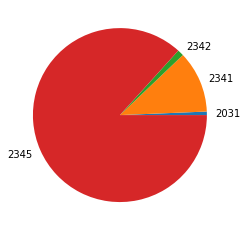

In [5]:
import matplotlib.pyplot as plt

# X 軸
stock_list = ['2031', '2341', '2342', '2345']
# Y 軸
volumes = [23341, 412221, 41907, 3115987]

plt.pie(volumes, labels=stock_list)
# 若使用 VS Code 搭配 terminal 終端機或 Jupyter Notebook 執行使用
plt.show()

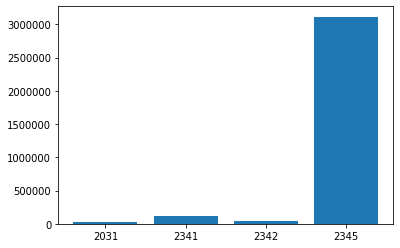

In [6]:
import matplotlib.pyplot as plt

# X 軸
stock_list = ['2031', '2341', '2342', '2345']
# Y 軸
volumes = [34123, 122212, 41907, 3115987]

plt.bar(stock_list,volumes)
plt.show()

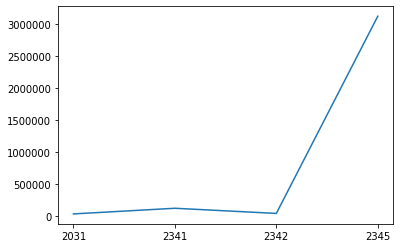

In [10]:
import matplotlib.pyplot as plt

# X 軸
stock_list = ['2031', '2341', '2342', '2345']
# Y 軸
volumes = [34123, 122212, 41907, 3115987]

plt.plot(stock_list,volumes)

plt.show()

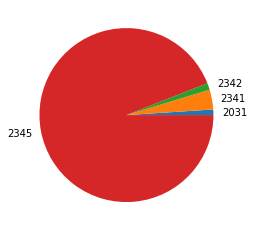

In [9]:
import matplotlib.pyplot as plt

# X 軸
stock_list = ['2031', '2341', '2342', '2345']
# Y 軸
volumes = [34123, 122212, 41907, 3115987]

plt.pie(volumes,labels=stock_list)
plt.show()

In [11]:
import csv

import requests
from bs4 import BeautifulSoup


url = 'https://goodinfo.tw/StockInfo/ShowSaleMonChart.asp?STOCK_ID=2330'

headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.181 Safari/537.36'}

resp = requests.get(url, headers=headers)

# 設定編碼為 utf-8 避免中文亂碼問題
resp.encoding = 'utf-8'

# 根據 HTTP header 的編碼解碼後的內容資料（ex. UTF-8），若該網站沒設定可能會有中文亂碼問題。所以通常會使用 resp.encoding 設定
raw_html = resp.text


# 將 HTML 轉成 BeautifulSoup 物件
soup = BeautifulSoup(raw_html, 'html.parser')

def parse_str_to_float(raw_value):
    return float(raw_value.replace(',', ''))

# 開始寫入檔案，把資料存放到 list 裡面
# 若是忘記 list/dict 用法可以回去複習一下
performance_list = []

# 使用 CSS Selector 選到對應的元素位置，取出裡面的值 (1-9)
for index in range(1, 10):
    print('index', index)
    # 每次迴圈都是新的 dict 內容
    performance_dict = {}
    performance_dict['date'] = soup.select(f'#row{index} > td:nth-child(1) > nobr')[0].text
    performance_dict['final_price'] = soup.select(f'#row{index} > td:nth-child(3) > nobr')[0].text
    performance_dict['year_revenue'] = parse_str_to_float(soup.select(f'#row{index} > td:nth-child(11) > nobr')[0].text)
    # 每月資料寫入 list
    performance_list.append(performance_dict)

# CSV 檔案第一列標題會是 date, final_price, year_revenue，記得要和 dict 的 key 相同，不然會出現錯誤
headers = ['date', 'final_price', 'year_revenue']

# 使用檔案 with ... open 開啟寫入檔案模式，透過 csv 模組將資料寫入
with open('performance.csv', 'w') as output_file:
    dict_writer = csv.DictWriter(output_file, headers)
    # 寫入標題
    dict_writer.writeheader()
    # 寫入值
    dict_writer.writerows(performance_list)

index 1
index 2
index 3
index 4
index 5
index 6
index 7
index 8
index 9


data          year_revenue
date                 
2020/01        1037.0
2019/12       10700.0
2019/11        9667.0
2019/10        8588.0
2019/09        7527.0
2019/08        6506.0
2019/07        5445.0
2019/06        4597.0
2019/05        3738.0


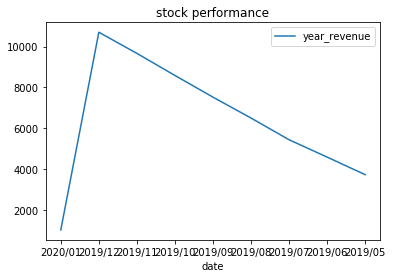

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# 讀取 CSV 資料
df = pd.read_csv('performance.csv')

# 選取所有列的 date, year_revenue 欄資料
data = df.loc[:, ['date', 'year_revenue']]
# 將 date 設為 index，要當作 X 軸使用
data = data.set_index('date')

print('data', data)

# 產生 line chart
fig = data.plot(kind='line').get_figure()
# 設定圖表標頭
plt.title('stock performance')


In [13]:
from matplotlib.font_manager import FontProperties

# windows 本機電腦請輸入該文字檔案位置 ex. C:\NotoSansCJK-Black.ttc
myfont = FontProperties(fname=r'./NotoSansCJK-Black.ttc')
plt.title('我是標題', fontproperties=myfont)

Text(0.5, 1.0, '我是標題')

FileNotFoundError: [Errno 2] No such file or directory: './NotoSansCJK-Black.ttc'

<Figure size 432x288 with 1 Axes>